<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session7/Final/mainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEm4p3GaGRckh-GNYbsMs9jAzad9H1ik9nEOKJ9Nj8PWTcfZAHdpJQ
Mounted at /content/gdrive


In [2]:
import sys
folder = '/content/gdrive/My Drive/S7'
sys.path.append(folder)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir('/content/drive/My Drive/EVA5/EVA-4-master/EVA-4-master/Session7/Final')

In [9]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test_py
import evaluate

In [10]:
classes, trainloader, testloader = train_test_loader.load()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


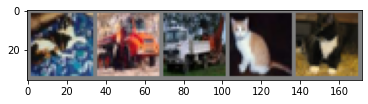

In [11]:
show_images.show_random_images(trainloader, classes)

In [12]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 16, 14, 14]           4,608
             ReLU-11           [-1, 16, 14, 14]               0
      BatchNorm2d-12           [-1, 16, 14, 14]              32
          Dropout-13           [-1, 16, 14, 14]               0
           Conv2d-14           [-1

In [13]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [14]:

EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_test_py.train(model, device, trainloader, optimizer, criterion, epoch)
    train_test_py.test(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.2402828931808472 Batch_id=390 Accuracy=47.83: 100%|██████████| 391/391 [00:11<00:00, 33.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 5534/10000 (55.34%)

EPOCH: 2


Loss=1.1110670566558838 Batch_id=390 Accuracy=62.53: 100%|██████████| 391/391 [00:11<00:00, 33.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6601/10000 (66.01%)

EPOCH: 3


Loss=0.8492321968078613 Batch_id=390 Accuracy=68.45: 100%|██████████| 391/391 [00:11<00:00, 33.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6742/10000 (67.42%)

EPOCH: 4


Loss=0.948875904083252 Batch_id=390 Accuracy=70.83: 100%|██████████| 391/391 [00:11<00:00, 33.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6897/10000 (68.97%)

EPOCH: 5


Loss=0.6602596044540405 Batch_id=390 Accuracy=73.16: 100%|██████████| 391/391 [00:11<00:00, 33.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7188/10000 (71.88%)

EPOCH: 6


Loss=0.7289783954620361 Batch_id=390 Accuracy=75.03: 100%|██████████| 391/391 [00:11<00:00, 33.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7377/10000 (73.77%)

EPOCH: 7


Loss=0.6468018889427185 Batch_id=390 Accuracy=76.24: 100%|██████████| 391/391 [00:11<00:00, 33.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 7333/10000 (73.33%)

EPOCH: 8


Loss=0.6834410429000854 Batch_id=390 Accuracy=76.81: 100%|██████████| 391/391 [00:11<00:00, 33.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7602/10000 (76.02%)

EPOCH: 9


Loss=0.7489004135131836 Batch_id=390 Accuracy=77.78: 100%|██████████| 391/391 [00:11<00:00, 32.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 7361/10000 (73.61%)

EPOCH: 10


Loss=0.5077311396598816 Batch_id=390 Accuracy=78.25: 100%|██████████| 391/391 [00:11<00:00, 32.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7539/10000 (75.39%)

EPOCH: 11


Loss=0.6101487874984741 Batch_id=390 Accuracy=79.18: 100%|██████████| 391/391 [00:11<00:00, 32.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7487/10000 (74.87%)

EPOCH: 12


Loss=0.5153489112854004 Batch_id=390 Accuracy=79.60: 100%|██████████| 391/391 [00:11<00:00, 32.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 7507/10000 (75.07%)

EPOCH: 13


Loss=0.8524409532546997 Batch_id=390 Accuracy=80.12: 100%|██████████| 391/391 [00:12<00:00, 32.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7609/10000 (76.09%)

EPOCH: 14


Loss=0.6126506924629211 Batch_id=390 Accuracy=80.45: 100%|██████████| 391/391 [00:11<00:00, 33.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 7639/10000 (76.39%)

EPOCH: 15


Loss=0.3315742015838623 Batch_id=390 Accuracy=81.03: 100%|██████████| 391/391 [00:11<00:00, 33.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7413/10000 (74.13%)

EPOCH: 16


Loss=0.5550309419631958 Batch_id=390 Accuracy=81.11: 100%|██████████| 391/391 [00:11<00:00, 33.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7849/10000 (78.49%)

EPOCH: 17


Loss=0.4746628403663635 Batch_id=390 Accuracy=81.63: 100%|██████████| 391/391 [00:11<00:00, 33.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7747/10000 (77.47%)

EPOCH: 18


Loss=0.594928503036499 Batch_id=390 Accuracy=82.17: 100%|██████████| 391/391 [00:11<00:00, 32.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7867/10000 (78.67%)

EPOCH: 19


Loss=0.4803578853607178 Batch_id=390 Accuracy=82.16: 100%|██████████| 391/391 [00:11<00:00, 33.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7801/10000 (78.01%)

EPOCH: 20


Loss=0.5526295900344849 Batch_id=390 Accuracy=82.63: 100%|██████████| 391/391 [00:11<00:00, 33.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7920/10000 (79.20%)

EPOCH: 21


Loss=0.45033231377601624 Batch_id=390 Accuracy=82.83: 100%|██████████| 391/391 [00:11<00:00, 32.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7894/10000 (78.94%)

EPOCH: 22


Loss=0.5400308966636658 Batch_id=390 Accuracy=83.04: 100%|██████████| 391/391 [00:11<00:00, 33.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7800/10000 (78.00%)

EPOCH: 23


Loss=0.497033029794693 Batch_id=390 Accuracy=83.16: 100%|██████████| 391/391 [00:11<00:00, 33.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7799/10000 (77.99%)

EPOCH: 24


Loss=0.39330559968948364 Batch_id=390 Accuracy=83.69: 100%|██████████| 391/391 [00:11<00:00, 33.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7738/10000 (77.38%)

EPOCH: 25


Loss=0.6265788674354553 Batch_id=390 Accuracy=83.82: 100%|██████████| 391/391 [00:11<00:00, 33.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8003/10000 (80.03%)

EPOCH: 26


Loss=0.5177332758903503 Batch_id=390 Accuracy=83.93: 100%|██████████| 391/391 [00:11<00:00, 32.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7970/10000 (79.70%)

EPOCH: 27


Loss=0.35308998823165894 Batch_id=390 Accuracy=84.24: 100%|██████████| 391/391 [00:12<00:00, 32.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7864/10000 (78.64%)

EPOCH: 28


Loss=0.535561203956604 Batch_id=390 Accuracy=84.18: 100%|██████████| 391/391 [00:11<00:00, 32.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7968/10000 (79.68%)

EPOCH: 29


Loss=0.38086041808128357 Batch_id=390 Accuracy=84.60: 100%|██████████| 391/391 [00:11<00:00, 33.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7937/10000 (79.37%)

EPOCH: 30


Loss=0.402226984500885 Batch_id=390 Accuracy=84.43: 100%|██████████| 391/391 [00:11<00:00, 32.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7930/10000 (79.30%)

EPOCH: 31


Loss=0.5879529714584351 Batch_id=390 Accuracy=84.95: 100%|██████████| 391/391 [00:11<00:00, 32.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7978/10000 (79.78%)

EPOCH: 32


Loss=0.5797344446182251 Batch_id=390 Accuracy=84.86: 100%|██████████| 391/391 [00:11<00:00, 33.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8002/10000 (80.02%)

EPOCH: 33


Loss=0.49089938402175903 Batch_id=390 Accuracy=85.16: 100%|██████████| 391/391 [00:11<00:00, 32.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8017/10000 (80.17%)

EPOCH: 34


Loss=0.6699286699295044 Batch_id=390 Accuracy=85.69: 100%|██████████| 391/391 [00:11<00:00, 33.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8051/10000 (80.51%)

EPOCH: 35


Loss=0.4482944905757904 Batch_id=390 Accuracy=85.59: 100%|██████████| 391/391 [00:11<00:00, 33.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8026/10000 (80.26%)

EPOCH: 36


Loss=0.3484283983707428 Batch_id=390 Accuracy=85.64: 100%|██████████| 391/391 [00:12<00:00, 32.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8004/10000 (80.04%)

EPOCH: 37


Loss=0.4895218312740326 Batch_id=390 Accuracy=85.79: 100%|██████████| 391/391 [00:12<00:00, 32.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8055/10000 (80.55%)

EPOCH: 38


Loss=0.3170866370201111 Batch_id=390 Accuracy=86.07: 100%|██████████| 391/391 [00:11<00:00, 32.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7974/10000 (79.74%)

EPOCH: 39


Loss=0.535744309425354 Batch_id=390 Accuracy=86.15: 100%|██████████| 391/391 [00:11<00:00, 33.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8080/10000 (80.80%)

EPOCH: 40


Loss=0.5146211385726929 Batch_id=390 Accuracy=86.06: 100%|██████████| 391/391 [00:12<00:00, 32.23it/s]



Test set: Average loss: 0.0052, Accuracy: 7972/10000 (79.72%)



GroundTruth:   frog   car  frog   car  deer
Predicted:   frog   car  frog   car  deer


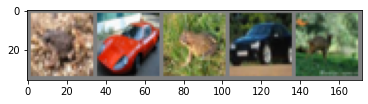

In [15]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [16]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 79 %


In [17]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 89 %
Accuracy of   car : 89 %
Accuracy of  bird : 86 %
Accuracy of   cat : 61 %
Accuracy of  deer : 82 %
Accuracy of   dog : 56 %
Accuracy of  frog : 90 %
Accuracy of horse : 69 %
Accuracy of  ship : 92 %
Accuracy of truck : 97 %
